# Scrabble Data

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

In [24]:
plt.style.use('fivethirtyeight')

In [12]:
points_df  = pd.read_csv("scrabble-point-spread.csv")
tournament_df = pd.read_csv("scrabble-tournament.csv")
df = tournament_df.merge(points_df, left_on='Player ID', right_on='player_id').fillna(0)
df.head()

,Byes,Credits,Losses,Name,New Rating,Old Rating,Other Money,Perf Rating,Place,Player ID,...,Seed,Spread,Ties,Tournament ID,Wins,division,player_id,points_against,points_for,tournament_id
0,0.0,0.0,7,Nigel Richards,2196,2168.0,0,2356.0,1,6003,...,1,1934,0.0,8163,24,Division 1,6003,381,443,8163
1,0.0,0.0,7,Komol Panyasophonlert,2070,2002.0,0,2372.0,2,20749,...,11,1868,0.0,8163,24,Division 1,20749,375,435,8163
2,0.0,0.0,8,Will Anderson,2093,2054.0,0,2264.0,3,19535,...,2,1623,0.0,8163,23,Division 1,19535,391,443,8163
3,0.0,0.0,9,Noah Walton,2063,2015.0,0,2239.0,4,18474,...,8,1628,0.0,8163,22,Division 1,18474,386,439,8163
4,0.0,0.0,10,Kenji Matsumoto,2057,2023.0,0,2212.0,5,583,...,5,1671,0.0,8163,21,Division 1,583,396,450,8163


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481 entries, 0 to 480
Data columns (total 21 columns):
Byes              481 non-null float64
Credits           481 non-null float64
Losses            481 non-null int64
Name              481 non-null object
New Rating        481 non-null int64
Old Rating        481 non-null float64
Other Money       481 non-null object
Perf Rating       481 non-null float64
Place             481 non-null int64
Player ID         481 non-null int64
Prize Money       481 non-null object
Seed              481 non-null int64
Spread            481 non-null int64
Ties              481 non-null float64
Tournament ID     481 non-null int64
Wins              481 non-null int64
division          481 non-null object
player_id         481 non-null int64
points_against    481 non-null int64
points_for        481 non-null int64
tournament_id     481 non-null int64
dtypes: float64(5), int64(12), object(4)
memory usage: 82.7+ KB


In [14]:
df['division'].head()

0    Division 1
1    Division 1
2    Division 1
3    Division 1
4    Division 1
Name: division, dtype: object

In [15]:
df['points_for'].head()

0    443
1    435
2    443
3    439
4    450
Name: points_for, dtype: int64

In [16]:
df['points_against'].head()

0    381
1    375
2    391
3    386
4    396
Name: points_against, dtype: int64

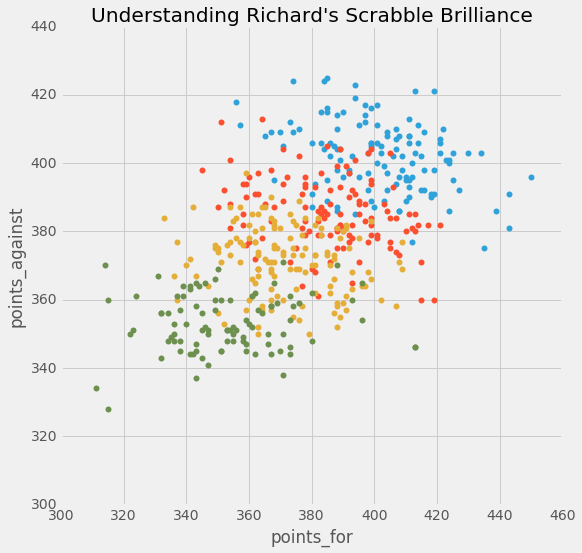

In [39]:
ax = df.plot(kind='scatter', x='points_for', y='points_against', figsize = (8,8) )
for category, group in df.groupby('division'):
    ax.plot(group['points_for'], group['points_against'], marker='o', linestyle='', label=category, markeredgewidth=0)
ax.set_xlim([300, 460])
ax.set_ylim([300, 440])
ax.set_title("Understanding Richard's Scrabble Brilliance")
plt.savefig('Scrabble_King.pdf', transparent=True, bbox_inches='tight')
